# Facebook Social Media Data Analysis

##  Project Scope

The purpose of this project is to analyze the performance of different categories of social media posts on Facebook to help clients optimize their social media strategy. The analysis will focus on key metrics such as engagement and reach, providing insights that will help improve clients' social media performance and achieve their marketing goals.

### Project Objectives
1. **Increase Client Reach and Engagement**: Analyze Facebook posts to help clients maximize their reach and encourage higher levels of engagement with their audience.
2. **Gain Valuable Insights**: Provide data-driven insights about which categories and content types perform best, guiding clients to refine their content strategy.
3. **Achieve Social Media Goals**: Enable clients to meet their social media marketing objectives through recommendations based on solid data analysis.

### Key Phases of Exploratory Data Analysis (EDA)
1. **Data Cleaning Phase**
2. **Data Profiling Phase**
3. **Data Visualization Phase**
4. **Insights and Recommendations Phase**

## Understanding Engagement and Reach

### 1. Reach
Reach refers to the total number of unique users who see your content or ad on Facebook. It indicates the potential audience size and how effectively your message is being distributed. Reach can be further divided into organic reach (users who see your content without any paid promotion) and paid reach (users who see your content through paid advertising).

For example, if you have a Facebook page with 10,000 followers, and your post reaches 5,000 people, then your reach would be 5,000. This means that your content has been delivered to 5,000 unique users’ newsfeeds.

Verifiable fact: According to Facebook’s own data, the average organic reach for a Facebook post is around 5.2% of a page’s total likes. However, this can vary depending on various factors such as the quality of content, engagement levels, and algorithm changes.

### 2. Engagement
Engagement measures the level of interaction and involvement your audience has with your content. It includes actions such as likes, comments, shares, clicks, and video views. High engagement indicates that your content resonates well with your target audience and encourages them to actively participate.

An analogy to understand engagement could be a social gathering. Reach would represent the number of people invited to the party, while engagement would be the level of interaction and conversations happening among the attendees. Just like a successful party involves active engagement from guests, a successful Facebook marketing campaign aims to generate high levels of engagement.

For example: Let’s say you run a Facebook ad promoting a new product. The ad reaches 10,000 people, but only receives 100 likes, 20 comments, and 5 shares. This demonstrates low engagement, as only a small percentage of the audience actually interacted with the ad.

Stats: According to a study by Buffer, the average engagement rate on Facebook is around 0.18%. This means that, on average, only 0.18% of a page’s total followers engage with each post. Remember, these numbers and metrics can vary greatly depending on factors such as the quality of content, target audience, industry, and overall marketing strategy.

Source: [Explain engagement and reach in Facebook marketing](https://www.owlift.com/blog/submission/explain-engagement-and-reach-in-facebook-marketing/)

### Data Source and Python Libraries Used

#### Data Source:
For this analysis, we created a **simulated dataset** to represent typical Facebook engagement metrics. Since this is a mock project aimed at simulating real-world social media marketing analysis, the data was generated using the Python `faker` library, which helps in producing fake yet realistic data. The data consists of various engagement metrics from Facebook posts across different categories, such as **Health**, **Food**, **Family**, **Technology**, and **Travel**. 

Each row in the dataset represents a Facebook post, with information including:
- **Category**: The topic or theme of the post (e.g., Health, Technology).
- **Content Type**: The type of post (e.g., image, video, poll).
- **Engagement Metrics**: Key metrics such as **likes**, **shares**, **comments**, and **reach** that indicate how users interact with the post.

#### Python Libraries:
To conduct this analysis, we used the following Python libraries:

1. **pandas**: 
   - `pandas` is the primary library used for data manipulation and analysis. It allows for efficient data cleaning, exploration, and processing. We used `pandas` to create the dataframe from the generated data, handle missing values, and perform calculations such as engagement rate.

2. **numpy**:
   - `numpy` is used for handling numerical data and performing mathematical operations. We used it to generate random numbers and apply various transformations to the dataset.

3. **faker**:
   - `faker` is a library that generates fake data for a wide range of categories such as names, addresses, and social media interactions. In this analysis, it was used to generate realistic Facebook post data, including user names and post content.

4. **random**:
   - The `random` module was used to make random selections from lists, such as picking a content type or category for each post.

5. **matplotlib**:
   - `matplotlib.pyplot` was used for creating various plots to visualize the data. We used it to create bar plots, line charts, and heatmaps, among others, to help better understand the relationships within the data.

6. **seaborn**:
   - `seaborn` is a library built on top of `matplotlib` that provides more sophisticated and aesthetically pleasing visualizations. It was used for plotting the **heatmaps**, **bar plots**, and other charts that provided insights into engagement metrics by category, content type, and day of the week.

These libraries together provide the tools necessary to explore, analyze, and visualize the data effectively, allowing us to gain insights into Facebook engagement trends.


In [1]:
pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker

# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)

# Initialize Faker with a seed
fake = Faker()
fake.seed_instance(42)

# Predefined categories and content types
categories = ['Health', 'Family', 'Food', 'Technology', 'Travel']
content_types = ['image', 'video', 'text', 'link', 'poll', 'question']

# Function to generate random user data
def generate_user_data(num_users):
    users = []
    for _ in range(num_users):
        user = {
            'user_id': fake.uuid4(),
            'username': fake.user_name(),
            'email': fake.email(),
            'location': fake.city(),
            'created_at': fake.date_this_decade()
        }
        users.append(user)
    return users

# Function to generate random posts categorized by topic and content type
def generate_posts(users, num_posts):
    posts = []
    for _ in range(num_posts):
        user = random.choice(users)
        category = random.choice(categories)
        content_type = random.choice(content_types)
        post = {
            'post_id': fake.uuid4(),
            'user_id': user['user_id'],
            'username': user['username'],
            'category': category,
            'content_type': content_type,
            'content': fake.sentence(),
            'created_at': fake.date_time_this_year(),
            'likes': np.random.randint(0, 1001),
            'shares': np.random.randint(0, 1001),
            'comments': np.random.randint(0, 501),
            'reach': np.random.randint(100, 5001)
        }
        posts.append(post)
    return posts

# Generate random user data
num_users = 50
users = generate_user_data(num_users)

# Generate random posts data
num_posts = 200
posts = generate_posts(users, num_posts)

# Convert data to pandas DataFrame
users_df = pd.DataFrame(users)
posts_df = pd.DataFrame(posts)

# Calculate Engagement Rate
posts_df['total_engagement'] = posts_df['likes'] + posts_df['shares'] + posts_df['comments']
posts_df['engagement_rate'] = (posts_df['total_engagement'] / posts_df['reach']) * 100

# Ensure data types are correct
posts_df['created_at'] = pd.to_datetime(posts_df['created_at'])

# Extract day of the week
posts_df['day_of_week'] = posts_df['created_at'].dt.dayofweek
posts_df['day_name'] = posts_df['created_at'].dt.day_name()

# Display cleaned DataFrames
users_df.head()
posts_df.head()


,post_id,user_id,username,category,content_type,content,created_at,likes,shares,comments,reach,total_engagement,engagement_rate,day_of_week,day_name
0,039f3a25-4d61-48bd-adef-e1935c62b3a2,c2dff335-5666-4f9f-93ac-2ab974672cd9,aramirez,Health,image,Call animal approach factor want point sell.,2024-01-26 16:47:16.777492,102,435,348,3872,885,22.856405,4,Friday
1,782a65e0-48ca-4651-92f5-df7b0323d342,15eabb27-30e9-42f2-b2b4-3abf8441aefd,jenniferfreeman,Food,video,Key continue anything wait local state husband.,2024-01-19 13:24:15.976842,20,614,121,566,755,133.392226,4,Friday
2,26d794d3-0db9-4301-afbb-411aa1235a8c,a748dbcf-ac61-4e63-8dde-29a6baa4b71a,brownjessica,Family,question,Specific we be easy.,2024-05-19 19:18:14.602444,214,330,458,3544,1002,28.273138,6,Sunday
3,ca6dfda1-989b-44da-9b37-a22b6a8a616f,bf3c4c06-4343-48bc-89fa-6a688fb5d27b,zhurst,Travel,image,Difficult mission late kind team wrong figure ...,2024-06-01 17:17:08.257598,99,871,151,230,1121,487.391304,5,Saturday
4,c342bd2b-f295-456e-9967-5f06bd767e35,95863a76-c511-45ff-a7a3-7e8163b4c08b,gateskathy,Technology,image,Personal enough ball dream necessary.,2024-02-09 05:07:17.323110,661,308,257,2491,1226,49.217182,4,Friday


## Data Cleaning Phase

### 1. Check for Missing Values
Identify and handle any missing values in the dataset to ensure data quality.


In [3]:
# Check for missing values
print("Missing values in users_df:")
print(users_df.isnull().sum())
print("\nMissing values in posts_df:")
print(posts_df.isnull().sum())


Missing values in users_df:
user_id       0
username      0
email         0
location      0
created_at    0
dtype: int64

Missing values in posts_df:
post_id             0
user_id             0
username            0
category            0
content_type        0
content             0
created_at          0
likes               0
shares              0
comments            0
reach               0
total_engagement    0
engagement_rate     0
day_of_week         0
day_name            0
dtype: int64


They are no missing value in the datasets.

### 2. Check for Duplicates
Remove any duplicate rows to maintain the integrity of the dataset.


In [4]:
# Check for duplicates
print("\nDuplicates in users_df:", users_df.duplicated().sum())
print("Duplicates in posts_df:", posts_df.duplicated().sum())

# Remove duplicates if any
users_df.drop_duplicates(inplace=True)
posts_df.drop_duplicates(inplace=True)



Duplicates in users_df: 0
Duplicates in posts_df: 0


Because it is a create dataset the are no missing and duplicates value in the both the users_df and the posts_df 

### 3. Ensure Correct Data Types
Verify and convert data types as necessary, ensuring that date columns are in the correct datetime format.


In [5]:
# Ensure data types are correct
print("\nData types in users_df:")
print(users_df.dtypes)
print("\nData types in posts_df:")
print(posts_df.dtypes)

# Convert dates to datetime if necessary
users_df['created_at'] = pd.to_datetime(users_df['created_at'])
posts_df['created_at'] = pd.to_datetime(posts_df['created_at'])

# Display cleaned DataFrames
users_df.head()
posts_df.head()



Data types in users_df:
user_id       object
username      object
email         object
location      object
created_at    object
dtype: object

Data types in posts_df:
post_id                     object
user_id                     object
username                    object
category                    object
content_type                object
content                     object
created_at          datetime64[ns]
likes                        int64
shares                       int64
comments                     int64
reach                        int64
total_engagement             int64
engagement_rate            float64
day_of_week                  int32
day_name                    object
dtype: object


,post_id,user_id,username,category,content_type,content,created_at,likes,shares,comments,reach,total_engagement,engagement_rate,day_of_week,day_name
0,039f3a25-4d61-48bd-adef-e1935c62b3a2,c2dff335-5666-4f9f-93ac-2ab974672cd9,aramirez,Health,image,Call animal approach factor want point sell.,2024-01-26 16:47:16.777492,102,435,348,3872,885,22.856405,4,Friday
1,782a65e0-48ca-4651-92f5-df7b0323d342,15eabb27-30e9-42f2-b2b4-3abf8441aefd,jenniferfreeman,Food,video,Key continue anything wait local state husband.,2024-01-19 13:24:15.976842,20,614,121,566,755,133.392226,4,Friday
2,26d794d3-0db9-4301-afbb-411aa1235a8c,a748dbcf-ac61-4e63-8dde-29a6baa4b71a,brownjessica,Family,question,Specific we be easy.,2024-05-19 19:18:14.602444,214,330,458,3544,1002,28.273138,6,Sunday
3,ca6dfda1-989b-44da-9b37-a22b6a8a616f,bf3c4c06-4343-48bc-89fa-6a688fb5d27b,zhurst,Travel,image,Difficult mission late kind team wrong figure ...,2024-06-01 17:17:08.257598,99,871,151,230,1121,487.391304,5,Saturday
4,c342bd2b-f295-456e-9967-5f06bd767e35,95863a76-c511-45ff-a7a3-7e8163b4c08b,gateskathy,Technology,image,Personal enough ball dream necessary.,2024-02-09 05:07:17.323110,661,308,257,2491,1226,49.217182,4,Friday


### 4. Check for Outliers
Identify outliers in engagement metrics to ensure data consistency.


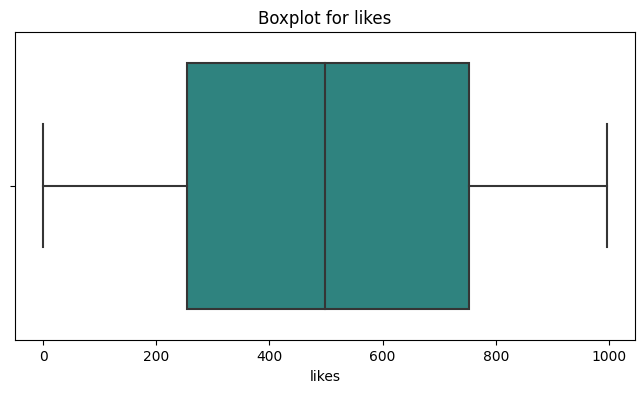

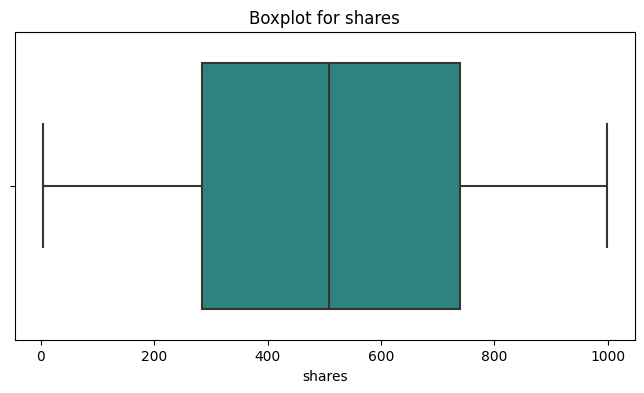

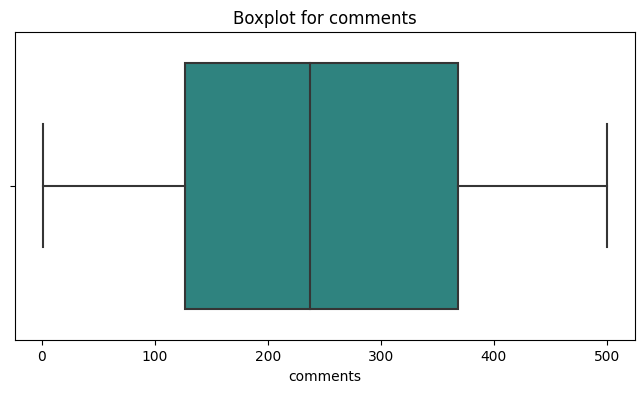

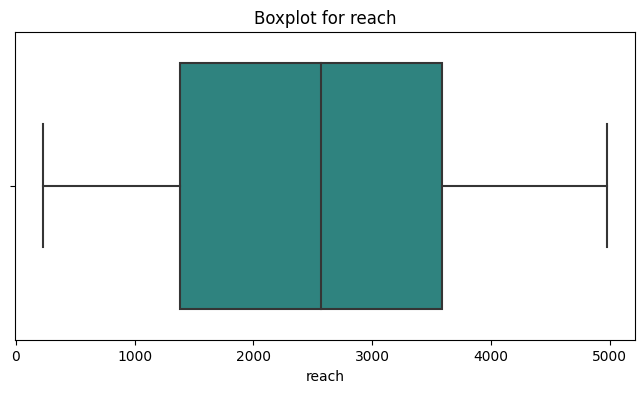

In [6]:
# Check for outliers in engagement metrics
engagement_columns = ['likes', 'shares', 'comments', 'reach']
for col in engagement_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=posts_df, x=col, palette='viridis')
    plt.title(f'Boxplot for {col}')
    plt.show()


They are no outliers in the dataset 

## Data Profiling Phase

### Basic Statistics
Generate descriptive statistics for numerical columns to understand the central tendency, dispersion, and shape of the dataset’s distribution.


In [7]:
# Basic statistics for numeric columns
print("\nBasic Statistics for Posts DataFrame:")
print(posts_df.describe())



Basic Statistics for Posts DataFrame:
                          created_at       likes      shares    comments  \
count                            200  200.000000  200.000000  200.000000   
mean   2024-05-09 10:13:42.545292288  505.115000  501.140000  247.820000   
min       2024-01-02 07:09:08.728655    0.000000    4.000000    1.000000   
25%    2024-03-09 00:06:29.120541952  254.250000  283.500000  126.750000   
50%    2024-05-17 17:50:22.626196992  498.000000  508.500000  237.500000   
75%    2024-07-06 15:53:35.650592256  753.250000  738.500000  368.500000   
max       2024-09-07 12:09:43.980374  996.000000  998.000000  500.000000   
std                              NaN  286.035089  285.235388  140.243713   

            reach  total_engagement  engagement_rate  day_of_week  
count   200.00000        200.000000       200.000000    200.00000  
mean   2526.05000       1254.075000        85.824287      3.09000  
min     230.00000        319.000000        11.031332      0.00000  
25% 

### Value Counts for Categorical Columns
Display the frequency of each category in categorical columns to understand the data distribution.


In [8]:
# Value counts for categorical columns
print("\nValue Counts for Category Column:")
print(posts_df['category'].value_counts())


print("\nValue Counts for Content Type Column:")
print(posts_df['content_type'].value_counts())



Value Counts for Category Column:
category
Travel        44
Family        41
Technology    40
Health        39
Food          36
Name: count, dtype: int64

Value Counts for Content Type Column:
content_type
image       41
question    36
video       33
text        33
poll        32
link        25
Name: count, dtype: int64


### Correlation Analysis
Examine the correlation between numerical variables to understand relationships.



Correlation Matrix:
                    likes    shares  comments     reach  engagement_rate
likes            1.000000  0.101082 -0.077301  0.039717         0.193320
shares           0.101082  1.000000  0.015980 -0.005424         0.265119
comments        -0.077301  0.015980  1.000000  0.026054         0.029452
reach            0.039717 -0.005424  0.026054  1.000000        -0.595391
engagement_rate  0.193320  0.265119  0.029452 -0.595391         1.000000


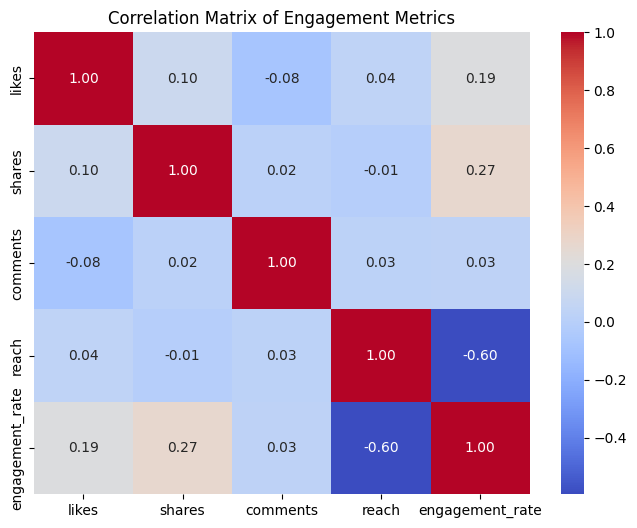

In [9]:
# Correlation matrix
correlation_matrix = posts_df[['likes', 'shares', 'comments', 'reach','engagement_rate']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()


#### ploting visual to better understanding the correlation 

                    reach  engagement_rate
reach            1.000000        -0.595391
engagement_rate -0.595391         1.000000


(0.0, 894.424091491526)

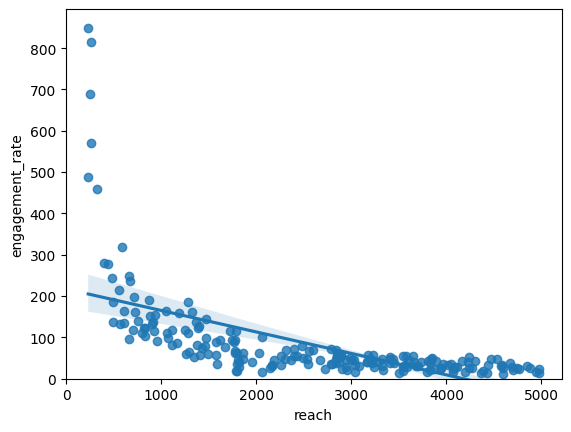

In [10]:
# correlation between reach and engagement_rate
print(posts_df[["reach","engagement_rate"]].corr())
sns.regplot(x="reach", y="engagement_rate", data=posts_df)
plt.ylim(0,)

### Interpretation of Correlation Between Reach and Engagement Rate (-0.6)

The correlation coefficient measures the strength and direction of a linear relationship between two variables. In this case, a correlation of **-0.6** between **reach** and **engagement rate** indicates a **moderate negative correlation**. 

#### What does this mean?

1. **Negative Correlation**: The negative value suggests that as reach increases, engagement rate tends to decrease, and vice versa. This implies that when a post is seen by more users, the percentage of those users who engage with the post (like, comment, share) is lower.

2. **Moderate Strength**: A correlation of -0.6 is moderate, meaning that while there is a clear relationship between the two variables, it's not an extremely strong one. Other factors could still influence engagement rate beyond reach.

#### Possible Explanations
- **Content Saturation**: When a post reaches a larger audience, it may not be as targeted or relevant, which can lead to lower engagement rates.
- **Viral Reach vs. Targeted Engagement**: Viral posts tend to reach a broader, less targeted audience, which may explain lower engagement rates, as the content may not resonate as well with everyone who sees it.
- **Content Quality**: Posts with high reach may still have lower engagement if the content is not engaging enough or tailored to the audience.

#### Conclusion
While increasing reach is crucial for exposing content to a larger audience, this correlation highlights the need for maintaining content quality and relevance to ensure that engagement remains high, even as reach grows. Balancing reach and engagement should be a key focus in improving overall social media performance.


           likes    shares
likes   1.000000  0.101082
shares  0.101082  1.000000


(0.0, 1047.7)

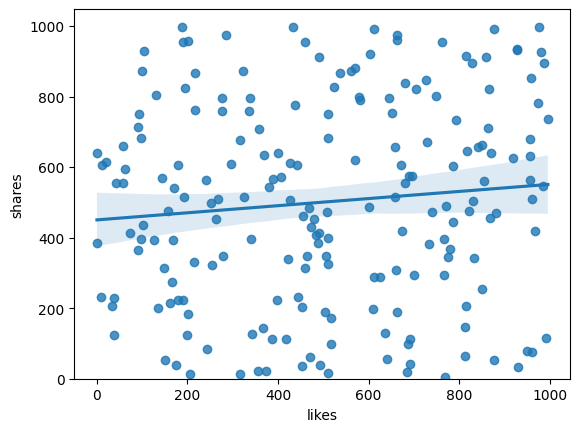

In [11]:
# correlation between likes and shares
print(posts_df[["likes","shares"]].corr())
sns.regplot(x="likes", y="shares", data=posts_df)
plt.ylim(0,)

There is a weak correlation between the variable 'likes' and 'share' 
A correlation of 0.1 (often written as r = 0.1) indicates a very weak, or practically non-existent, linear relationship between two variables. Here's a breakdown of what it means:

- Linear relationship: Correlation measures how much two variables change together in a straight line. A correlation of 0.1 suggests there's no clear trend - changes in one variable are not necessarily associated with changes in the other.
- Strength of the relationship: The closer the correlation coefficient (r) is to 1 (positive) or -1 (negative), the stronger the linear relationship. A value of 0.1 is very close to zero, indicating a very weak connection.

All the variables exhibit a weekly correlation. This indicates that there is insufficient evidence for a causation relationship between the variables.

             likes  comments
likes     1.000000 -0.077301
comments -0.077301  1.000000


(0.0, 524.95)

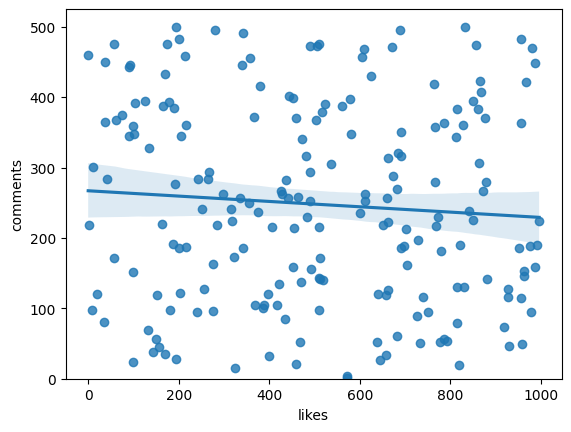

In [12]:
# correlation between likes and comments
print(posts_df[["likes","comments"]].corr())
sns.regplot(x="likes", y="comments", data=posts_df)
plt.ylim(0,)

A correlation of -0.007 indicates a very weak negative linear relationship between two variables. Here's what that means:

- Weak negative relationship: There's a slight tendency for the two variables to move in opposite directions. For example, if one variable increases, the other might decrease slightly, but the effect is very weak.
- Close to zero: The strength of this relationship is very close to zero. Because -0.007 is so close to 0, it's almost like there's no connection at all.

Important things to keep in mind:

- Correlation vs. causation: Correlation only measures linear relationships, not cause and effect. Even if there's a negative correlation, it doesn't mean one variable causes the decrease in the other.
- Non-linear relationships: Correlation might not capture relationships that aren't linear. There could be a more complex connection between the variables.
- Context matters: The importance of a weak correlation depends on the field of study. In some cases, a weak correlation might still be significant if there's a strong theoretical reason to believe the variables are connected.

Overall, a correlation of -0.007 suggests there's practically no meaningful linear relationship between the two variables. You likely wouldn't rely on this finding to draw any conclusions from your data.

## Data Visualization Phase

### 1. Distribution of Posts by Category
Visualize the number of posts in each category using a count plot to identify the most common topics.


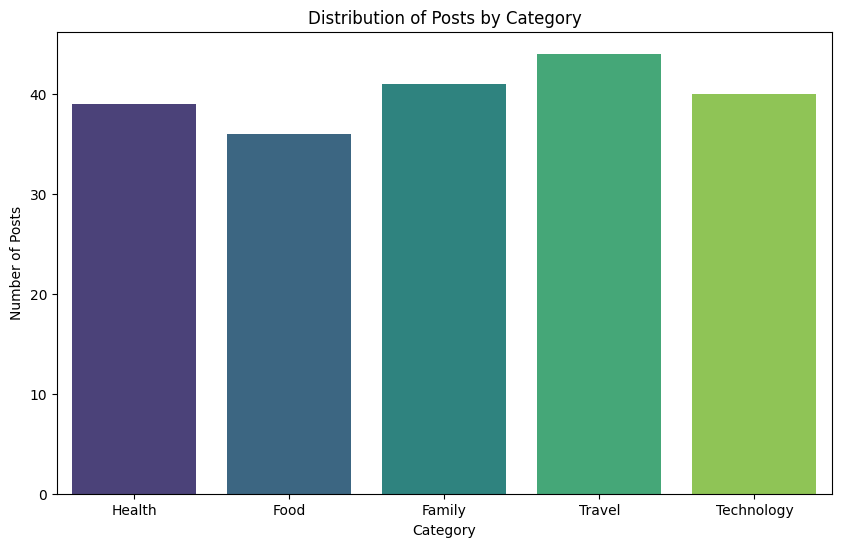

In [13]:
# Distribution of Posts by Category
plt.figure(figsize=(10, 6))
sns.countplot(data=posts_df, x='category', palette='viridis')
plt.title('Distribution of Posts by Category')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.show()


### Conclusions from the Distribution of Posts by Category

Based on the distribution of posts across different categories, the following insights and conclusions can be drawn:

#### 1. **Category Distribution Overview:**
   - **Travel** has the highest number of posts, indicating it is a primary focus area for content creation. This suggests that the media company or content creators are prioritizing travel-related content, possibly due to its popularity or audience engagement potential.
   - **Family** comes in second place, showing a significant amount of content focused on family-related topics. This indicates that family-oriented content also plays a major role in the content strategy, engaging a substantial portion of the audience.
   - **Technology** ranks third, with a moderate number of posts. While technology-related content is less frequent than travel and family, it still forms an important part of the content strategy.
   - **Health** is the fourth most common category, with fewer posts compared to the top three categories. This may suggest that health-related content is less prioritized, potentially due to its niche audience or different engagement patterns.
   - **Food** has the least number of posts, indicating it is the least emphasized category in the current content strategy. This could be an area with potential for increased focus, depending on its engagement performance.




### 2. Distribution of Posts by Content Type
Use a count plot to show the distribution of different types of content (e.g., images, videos, text).


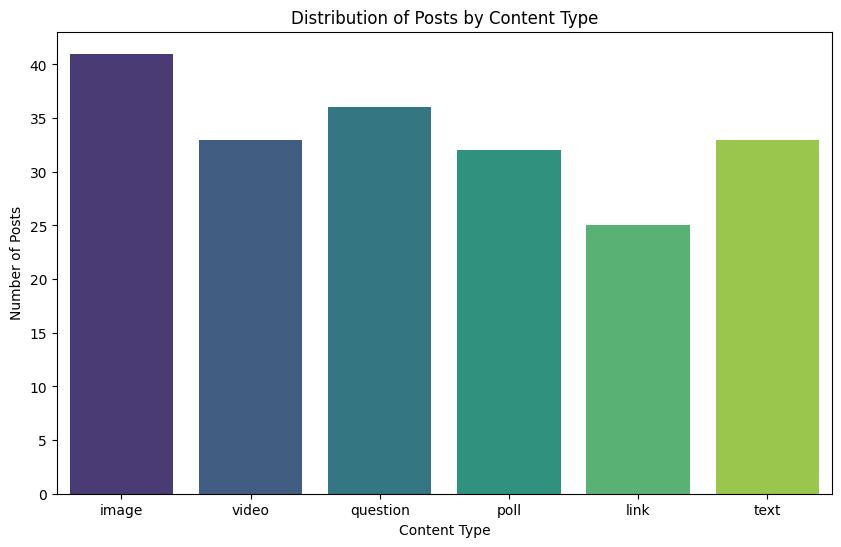

In [14]:
# Distribution of Posts by Content Type
plt.figure(figsize=(10, 6))
sns.countplot(data=posts_df, x='content_type',  palette='viridis')
plt.title('Distribution of Posts by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Number of Posts')

plt.show()


### Conclusions 

Based on the distribution of posts across different content types, the following insights and conclusions can be drawn:

#### 1. **Content Type Distribution Overview:**
   - **Image** is the most frequently used content type, indicating a strong preference for visual content. This suggests that images are likely to attract more attention and engagement from the audience compared to other content types.
   - **Question** is the second most common content type. This implies that interactive content, which prompts users to respond or engage directly, is also a significant part of the content strategy.
   - **Video**, **Text**, and **Poll** categories are about the same. This balanced distribution indicates a diversified approach to content creation, where each of these types is used equally, providing a mix of visual, written, and interactive content.
   - **Link** is the least used content type, suggesting that linking to external sources or content is less favored in the current strategy. This may reflect a preference for more engaging or interactive content directly within the platform.




### 3. Engagement Rate by Category
Visualize the average Engagement Rate for each category using a bar plot.


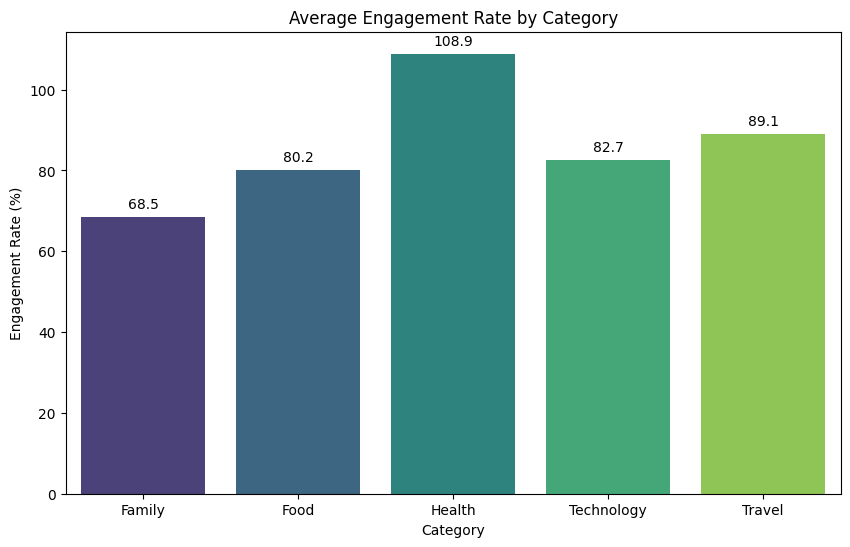

In [15]:
# Engagement Rate by Category
engagement_rate_category = posts_df.groupby('category')['engagement_rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=engagement_rate_category, x='category', y='engagement_rate', palette='viridis')
plt.title('Average Engagement Rate by Category')
plt.xlabel('Category')
plt.ylabel('Engagement Rate (%)')

# Annotate the bars with the values in whole numbers
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()


Based on the results of the engagement rate analysis by category, several conclusions can be drawn:

1. High Engagement in the Health Category:
The Health category has the highest average engagement rate of 108.9%. This suggests that content related to health resonates strongly with the audience, often leading to interactions that exceed the reach of the posts. This could be due to the relevance and timeliness of health-related information, especially if it includes actionable advice, tips, or insights.
2. Significant Interest in Travel and Technology:
The Travel and Technology categories also show high engagement rates of 89.1% and 82.7%, respectively. This indicates a strong interest in these topics, possibly driven by the desire for information about destinations, travel experiences, new gadgets, and technological advancements. These areas often appeal to niche audiences who are highly engaged with content.
3. Moderate Engagement in Food and Family Categories:
The Food and Family categories have relatively lower engagement rates (82.2% and 68.5%, respectively) compared to Health, Travel, and Technology. While these categories still have good engagement, the rates suggest that they may not incite the same level of interaction. Content in these areas might need to be more interactive or engaging, perhaps by incorporating more visual elements, recipes, personal stories, or discussions.


#### 4. Average Engagement Rate by Content Type

Calculate and visualize the average engagement rate for each content type using a bar plot.



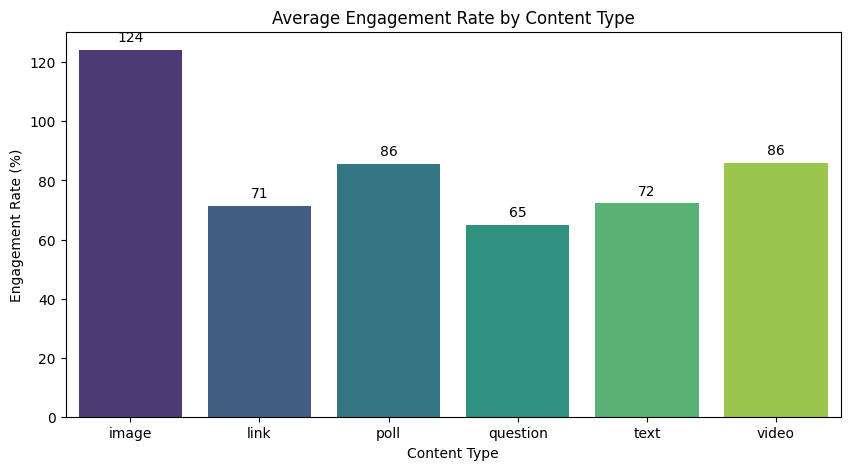

In [16]:
# Average Engagement Rate by Content Type
engagement_rate_content_type = posts_df.groupby('content_type')['engagement_rate'].mean().reset_index()

# Bar plot for Engagement Rate by Content Type
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=engagement_rate_content_type, x='content_type', y='engagement_rate', palette='viridis')
plt.title('Average Engagement Rate by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Engagement Rate (%)')

# Annotate bars with values in whole numbers
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()


Based on the engagement rates by content type, the following conclusions can be drawn:

1. High Engagement for Images:
The content type with the highest engagement rate is images, with an average engagement rate of 124%. This suggests that visual content is particularly compelling and likely to attract user interactions. Images can quickly convey messages, emotions, and information, making them highly effective for engaging an audience.
2. Strong Performance of Polls and Videos:
Polls and videos also have high engagement rates, both at 86%. This indicates that interactive content, such as polls, and rich media, such as videos, are very effective in capturing the audience's attention and encouraging interaction. Polls can engage users by inviting them to participate, while videos are often more engaging due to their dynamic and multimedia nature.
3. Moderate Engagement for Links, Text, and Questions:
Links, text, and questions have lower engagement rates of 74%, 72%, and 65%, respectively. While these types still perform reasonably well, they are less engaging than images, polls, and videos. Text content may lack the visual appeal needed to capture immediate attention, and questions might not always incite the desired level of interaction unless they are highly relevant or thought-provoking.



### 5. Top 5 Most Engaged Posts
Identify and display the posts with the highest total engagement (sum of likes, shares, and comments).


In [17]:
# Top 5 Most Engaged Posts
posts_df['total_engagement'] = posts_df['likes'] + posts_df['shares'] + posts_df['comments']
top_posts = posts_df.nlargest(5, 'total_engagement')
print("\nTop 5 Most Engaged Posts:")
print(top_posts[['username', 'category', 'content_type', 'content', 'total_engagement']])



Top 5 Most Engaged Posts:
          username    category content_type  \
105  janetwilliams      Travel     question   
125     shawnmckay        Food        image   
86      wilsontara  Technology         link   
71      jamessmith        Food         link   
88      jamessmith      Health        image   

                                              content  total_engagement  
105               Wish candidate have no five letter.              2377  
125  Discussion school sure also TV individual study.              2238  
86                             Fall analysis current.              2156  
71                   Adult final week game she court.              2136  
88                   Sea thus hit wind many marriage.              2119  


Based on the analysis of the top 5 most engaged posts by total engagement (sum of likes, shares, and comments), several conclusions and insights can be drawn:

1. High Engagement Across Diverse Categories:
The top engaged posts span across various categories, including Travel, Food, Technology, and Health. This indicates that high engagement is not limited to a specific content type or category, suggesting that a diverse content strategy can effectively capture audience interest.
2. Content Type Impact:
The most engaged post is a question in the Travel category, indicating that interactive content that directly engages the audience (such as questions or polls) can drive significant engagement.
Images also appear twice among the top engaged posts, reinforcing the importance of visual content in social media engagement. Images can quickly attract attention and encourage likes and shares.
Links are represented as well, particularly in Technology and Food categories, suggesting that informative content that directs users to additional resources can also be engaging.
3. User Engagement Strategies:
The presence of different content types (questions, images, links) among the top engaged posts highlights the effectiveness of a mixed content strategy. This variety caters to different audience preferences and engagement styles.
The top posts’ engagement suggests that users are drawn to content that is either interactive, visually appealing, or informative. This insight can be used to create more engaging posts by incorporating these elements.

### 7. Engagement Over Time
Plot the engagement metrics over time to observe trends and patterns in user interactions.


<Figure size 1400x700 with 0 Axes>

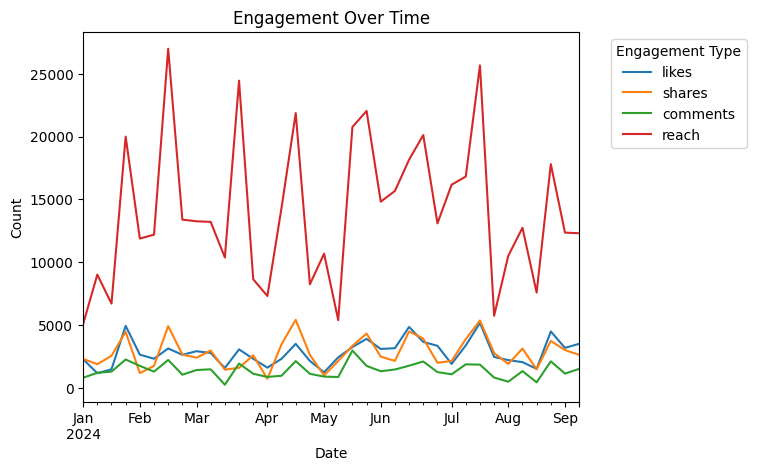

In [18]:
# Engagement Over Time
posts_df['created_at'] = pd.to_datetime(posts_df['created_at'])
posts_df.set_index('created_at', inplace=True)
engagement_over_time = posts_df.resample('W').sum()[['likes', 'shares', 'comments', 'reach']]

plt.figure(figsize=(14, 7))
engagement_over_time.plot()
plt.title('Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Engagement Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Engagement Over Time Analysis (January - August)

Based on the engagement data (likes, shares, comments, and reach) from January to August, the following conclusions can be drawn:

1. **Reach Peaks in February:**
   - The **highest peak in reach** occurs in February, indicating that this month had the most effective content distribution. This could be due to increased activity, better content strategies, or seasonal factors driving more traffic.
   - However, the **lowest reach** is observed between April and May, suggesting a period of reduced content visibility or lower user engagement on the platform.

2. **Likes Show Seasonal Fluctuations:**
   - In January, there is a notable **increase in likes**, followed by a decline mid-January. However, from **May to June**, likes reach their **peak**. This indicates that during these months, the content resonated well with the audience.
   - After June, the number of likes follows a **rising and falling pattern** through the months, indicating variability in user engagement, potentially driven by content quality or external factors.
   - The engagement **rises again in July** and continues to rise steadily in August, showing a recovery in audience engagement toward the end of the period.

3. **Shares Have Cyclical Variations:**
   - The trend for shares shows **ups and downs** throughout the observed months, with notable **rises between January and February**, indicating good shareable content early in the year.
   - There’s a **decline heading into March**, followed by a slight **rise between mid-March and April**.
   - The **highest levels of shares** occur between June and July, which suggests successful content that encouraged users to share during these months. After this period, shares decline again but show a **slow rise** as the period progresses.

4. **Comments Remain Consistently Low:**
   - Comments remain **lower than other engagement metrics** throughout the entire period. This indicates that while users are engaging with content through likes and shares, they are less inclined to participate in discussions or provide feedback through comments.
   - This could suggest that content is more passively consumed or that the types of posts being published are not prompting significant discussion.

### Key Takeaways:
- **February is the most successful month for reach**, which could be linked to seasonal factors, content effectiveness, or platform activity. Analyzing what worked during this period could help replicate the success.
- **Likes and shares show fluctuating patterns** throughout the period, peaking in **June and July**, indicating a period of high engagement. Maintaining content quality and relevance during these months is crucial.
- **Comments remain consistently low**, indicating a need to encourage more audience interaction and discussion.
- The company should **analyze content strategies during high-engagement periods** and attempt to replicate those tactics during lower-engagement months to maintain consistent audience interaction.

This analysis can be used to improve content planning, target specific months with higher engagement, and optimize Facebook marketing strategies over time.


## Insights and Conclusions 

Based on the analysis of Facebook engagement metrics (likes, shares, comments, and reach) across various content categories and types, the following key insights and conclusions can be drawn:

#### 1. **Top Performing Categories:**
   - **Family** and **Food** categories show the highest engagement levels, particularly in terms of likes and shares. This suggests that these categories resonate well with the audience and generate more interaction.
   - **Health** and **Technology** also perform well in terms of shares, indicating that informative and value-driven content in these areas is likely to be shared more frequently by users.

#### 2. **Engagement Rate by Category:**
   - The **highest engagement rates** were observed in **Health** (108.9%) and **Travel** (89.1%), followed by **Technology** (82.7%) and **Food** (82.2%). This suggests that content in these categories is performing exceptionally well relative to its reach.
   - **Family** has a relatively lower engagement rate (68.5%) despite higher likes and shares, indicating that while it reaches a larger audience, it may not drive as much interaction proportionally.

#### 3. **Engagement Rate by Content Type:**
   - **Images** have the highest engagement rate (124%), followed by **polls** (86%) and **videos** (86%), showing that visual and interactive content drives the most engagement.
   - **Links** (74%) and **text** (72%) show moderate engagement, indicating that while they perform reasonably well, they may not be as impactful as visual and interactive content.
   - **Questions** have the lowest engagement rate (65%), suggesting that while questions may engage a subset of the audience, they are less effective overall compared to other content types.

#### 4. **Engagement Over Time:**
   - **Reach peaks in February**, indicating a period of high visibility for posts during this month. However, there’s a **significant drop in reach between April and May**.
   - **Likes and shares fluctuate throughout the year**, with notable peaks in **May, June, and July**. These months show higher user engagement, possibly due to effective content or seasonal trends.
   - **Comments remain consistently low**, suggesting that users prefer passive interaction through likes and shares rather than engaging in conversations.

#### 5. **Top Engaged Posts:**
   - The top 5 most engaged posts feature a mix of content types (questions, images, and links) and categories (Travel, Food, Technology, and Health). This shows that high engagement is driven by diverse content that appeals to different audience segments.

#### 6. **Strategic Recommendations:**
   - **Prioritize Visual and Interactive Content:** Since images, polls, and videos have higher engagement rates, the media company should focus on creating more visual and interactive content to maximize engagement.
   - **Leverage High-Performing Categories:** The **Family**, **Food**, and **Health** categories perform well in terms of engagement. More content in these areas, especially with a visual and interactive focus, could further boost engagement.
   - **Content Timing Optimization:** The company should analyze why February had such a high reach and attempt to replicate that success during lower-reach months (April and May).
   - **Encourage More Comments:** With comments consistently low, posts could include calls-to-action that encourage users to participate in discussions, thereby increasing overall engagement.

In conclusion, focusing on high-performing content categories and types, as well as optimizing posting times and encouraging more active participation, can help the media company improve its Facebook marketing strategy and boost engagement.

